In [ ]:
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#checking the contents inside directory
!ls "/content/drive/My Drive/Dataset_ST662"

DINGLE.csv   KERRY.xlsx    KILLARNEY.csv  MAYNOOTH.csv	TRALEE.csv
KENMARE.csv  KILDARE.xlsx  LEIXLIP.csv	  NAAS.csv


In [ ]:
#changing the directory to where we have dataset
os.chdir('/content/drive/My Drive/Dataset_ST662')

In [ ]:
#read entire cell before executing
#reading dataset county wise i.e. KERRY and KILDARE for colab
df_kildare = pd.read_excel('KILDARE.xlsx')
df_kerry= pd.read_excel('KERRY.xlsx')
#uncommennt below 2 lines to see head
#df_kildare.head()
#df_kerry.head()

#if you are running in your local system using jupyter use below commands and comment all lines above
#df_kerry = pd.read_excel('KERRY.xlsx', encoding='latin1')
#df_kildare = pd.read_excel('KILDARE.xlsx', encoding='latin1')

This is optional code for concating multiple csv files into single df. Rather than doing manually we are doing it using python script.

##For this to work you must have separate csv files for each year

###WARNING - If you are running this code for the 2nd or more time then you should consider skipping this and next 3 blocks or else you should first delete combined_csv file from your directory


####importing necessary libraries 
import os
import glob
#####import pandas as pd
os.chdir("/content/drive/My Drive/Dataset_ST662")
#####using glob library to find csv format and save file names in all_filenames
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
all_filenames
#####combine all files in the list
combined_csv = pd.concat([pd.read_csv(f, encoding='cp1252') for f in all_filenames ])
#####export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

# Analysing both datasets of Kerry and Kildare

In [ ]:
print(df_kerry.shape)
print(df_kildare.shape)
print(df_kerry.describe())
print(df_kildare.describe())

(13244, 9)
(23026, 9)
          Price (€)
count  1.324400e+04
mean   1.593322e+05
std    1.402382e+05
min    5.250000e+03
25%    8.300000e+04
50%    1.375000e+05
75%    2.000000e+05
max    4.096916e+06
          Price (€)
count  2.302600e+04
mean   2.641277e+05
std    3.299305e+05
min    6.500000e+03
25%    1.700000e+05
50%    2.430000e+05
75%    3.171806e+05
max    2.650000e+07


In [ ]:
#let's rename price and date columns to simple names
df_kerry.rename(columns = {'Price (€)' : 'Price', 'Date of Sale (dd/mm/yyyy)' : 'Date'}, inplace = True)
df_kildare.rename(columns = {'Price (€)' : 'Price', 'Date of Sale (dd/mm/yyyy)' : 'Date'}, inplace = True)

# Checking unique entries of all columns

In [ ]:
print(df_kildare['Property Size Description'].unique())
print(df_kildare['Description of Property'].unique())
print(df_kildare['VAT Exclusive'].unique())
print(df_kildare['Postal Code'].unique())
print(df_kildare['Not Full Market Price'].unique())

#here we found out that there are mainly two types of houses 38-125 sq metre and >125
#there are either new houses or second-hand houses
#there are 4-5 entries of unique code which are irrelevant for our case

[nan 'greater than or equal to 38 sq metres and less than 125 sq metres'
 'less than 38 sq metres' 'greater than 125 sq metres'
 'greater than or equal to 125 sq metres']
['Second-Hand Dwelling house /Apartment' 'New Dwelling house /Apartment'
 'Teach/Árasán Cónaithe Atháimhe']
['No' 'Yes']
[nan 'Dublin 4' 'Dublin 15' 'Dublin 11' 'Dublin 2' 'Dublin 8' 'Dublin 16'
 'Dublin 18' 'Dublin 9']
['No' 'Yes']


In [ ]:
#similarly for kerry
print(df_kerry['Property Size Description'].unique())
print(df_kerry['Description of Property'].unique())
print(df_kerry['VAT Exclusive'].unique())
print(df_kerry['Postal Code'].unique())
print(df_kerry['Not Full Market Price'].unique())

[nan 'greater than 125 sq metres'
 'greater than or equal to 38 sq metres and less than 125 sq metres'
 'less than 38 sq metres' 'greater than or equal to 125 sq metres']
['Second-Hand Dwelling house /Apartment' 'New Dwelling house /Apartment']
['No' 'Yes']
[nan 'Dublin 16' 'Dublin 11']
['No' 'Yes']


In [ ]:
#let's remove duplicate entries
df_kildare['Property Size Description']=df_kildare['Property Size Description'].replace(['greater than 125 sq metres'],'greater than or equal to 125 sq metres')
df_kildare['Description of Property']=df_kildare['Description of Property'].replace(['Teach/Árasán Cónaithe Atháimhe'],'Second-Hand Dwelling house /Apartment')
df_kerry['Property Size Description']=df_kerry['Property Size Description'].replace(['greater than 125 sq metres'],'greater than or equal to 125 sq metres')


In [ ]:
#let's make a new column which takes price in 100,000
df_kildare['PRICE']=df_kildare['Price']/100000
df_kerry['PRICE']=df_kerry['Price']/100000

In [ ]:
#let's create two more columns which have year and month for each county
df_kildare['Year']=pd.DatetimeIndex(df_kildare['Date']).year
df_kildare['Month']=pd.DatetimeIndex(df_kildare['Date']).month
df_kerry['Year']=pd.DatetimeIndex(df_kerry['Date']).year
df_kerry['Month']=pd.DatetimeIndex(df_kerry['Date']).month
#let's create date as index for both dataframes
df_kildare.index=df_kildare['Date']
df_kerry.index=df_kerry['Date']

In [ ]:
print(df_kildare.info())
print(df_kerry.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23026 entries, 2010-01-05 to 2020-12-23
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       23026 non-null  datetime64[ns]
 1   Address                    23026 non-null  object        
 2   Postal Code                9 non-null      object        
 3   County                     23026 non-null  object        
 4   Price                      23026 non-null  float64       
 5   Not Full Market Price      23026 non-null  object        
 6   VAT Exclusive              23026 non-null  object        
 7   Description of Property    23026 non-null  object        
 8   Property Size Description  4005 non-null   object        
 9   PRICE                      23026 non-null  float64       
 10  Year                       23026 non-null  int64         
 11  Month                      23026 non-null  int64  

# Boxplot of both counties as per description of property

In [ ]:
import plotly.express as px
fig = px.box(df_kerry, y="PRICE", color="Description of Property", title="Boxplot of Price for KERRY grouped by Description of Property")
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(df_kildare, y="PRICE", color="Description of Property", title="Boxplot of Price for KILDARE grouped by Description of Property")
fig.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



Text(0.5, 1.0, 'Second Hand vs New Houses for Kildare')

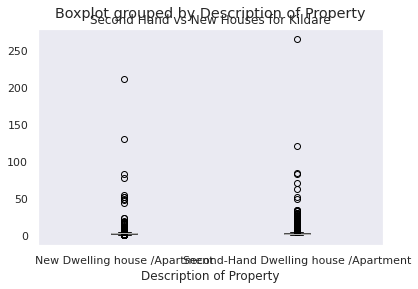

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
df_kildare.boxplot(by ='Description of Property', column =['PRICE'], grid = False)
plt.title("Second Hand vs New Houses for Kildare")
# we see that second hand property doesn't have much outlier and not as extreme value as new houses have.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



Text(0.5, 1.0, 'Second Hand vs New Houses for Kerry')

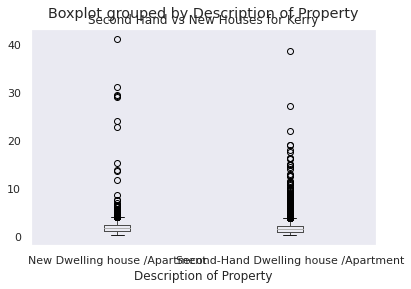

In [ ]:
df_kerry.boxplot(by ='Description of Property', column =['PRICE'], grid = False)
plt.title("Second Hand vs New Houses for Kerry")

In [ ]:
df_allcounties = pd.concat([df_kerry,df_kildare])

# Code for filtering towns from county dataset
## no need to run this
### going to throw error if you run
### already filered



In [ ]:
#creating new column of town which has null values
df1['Town'] = None
#capitalizing the entire address column
df1['Address']=df1['Address'].str.upper()
#populating NAAS, ROBERSTOWN and MAYNOOTH for matching TOWNS
for item in df1['Address']:
    
    #s = item.lower().split()


    df1['Town'][df1['Address'].str.contains('NAAS')] = 'NAAS'
    df1['Town'][df1['Address'].str.contains('LEIXLIP')] = 'LEIXLIP'
    
    df1['Town'][df1['Address'].str.contains('MAYNOOTH')] = 'MAYNOOTH'

In [ ]:
#creating towns for kerry county also
#creating new column of town which has null values
df2['Town'] = None
#capitalizing the entire address column
df2['Address']=df2['Address'].str.upper()
#populating LUCAN, DUBLIN CITY, HOWTH and RATHMINES for matching TOWNS
for item in df2['Address']:

    df2['Town'][df2['Address'].str.contains('DINGLE')] = 'DINGLE'
    df2['Town'][df2['Address'].str.contains('KENMARE')] = 'KENMARE'
    
    df2['Town'][df2['Address'].str.contains('KILLARNEY')] = 'KILLARNEY'
    df2['Town'][df2['Address'].str.contains('TRALEE')] = 'TRALEE'

# Analysing town wise 
From here onwards we will read all downs dataset from drive and analyse it.

In [ ]:
df_maynooth=pd.read_csv("MAYNOOTH.csv")
df_naas= pd.read_csv("NAAS.csv")
df_leixlip = pd.read_csv("LEIXLIP.csv")
df_t = pd.read_csv("TRALEE.csv")
df_d=pd.read_csv("DINGLE.csv")
df_ken=pd.read_csv("KENMARE.csv")
df_kil=pd.read_csv("KILLARNEY.csv")

In [ ]:
df_alltowns=pd.concat([df_maynooth, df_naas, df_leixlip,df_t, df_d, df_ken,df_kil])

In [ ]:
# convert the 'Date' column to datetime format
df_alltowns['Date']= pd.to_datetime(df_alltowns['Date'])
#setting Date as index
df_alltowns.index=df_alltowns['Date']
#dropping the extra index columns
df_alltowns = df_alltowns.drop(df_alltowns.columns[[0]], axis=1)

In [ ]:
df_alltowns.head()

,Date,Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,PRICE,Year,Month,Town
Date,,,,,,,,,,,,,
2019-04-01,2019-04-01,"17 THE MEADOWS, MOYGLARE HALL, MAYNOOTH",NaN,Kildare,359559.47,No,Yes,New Dwelling house /Apartment,NaN,3.595595,2019,4,MAYNOOTH
2019-09-01,2019-09-01,"7 NEWTOWN HALL, MAYNOOTH, KILDARE",NaN,Kildare,318000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,3.180000,2019,9,MAYNOOTH
2019-10-01,2019-10-01,"14 THE MEADOWS, MOYGLARE HALL, MAYNOOTH",NaN,Kildare,400881.00,No,Yes,New Dwelling house /Apartment,NaN,4.008810,2019,10,MAYNOOTH
2019-01-18,2019-01-18,"11 HERITAGE HOUSE, LYREEN MANOR, MAYNOOTH",NaN,Kildare,233000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2.330000,2019,1,MAYNOOTH
2019-01-18,2019-01-18,"32 CASTLEBRIDGE, MAYNOOTH, KILDARE",NaN,Kildare,332000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,3.320000,2019,1,MAYNOOTH


# Visualizations for different towns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline
plt.close("all")

In [ ]:
fig = px.box(df_alltowns, color="Town", y="PRICE")
fig.show()

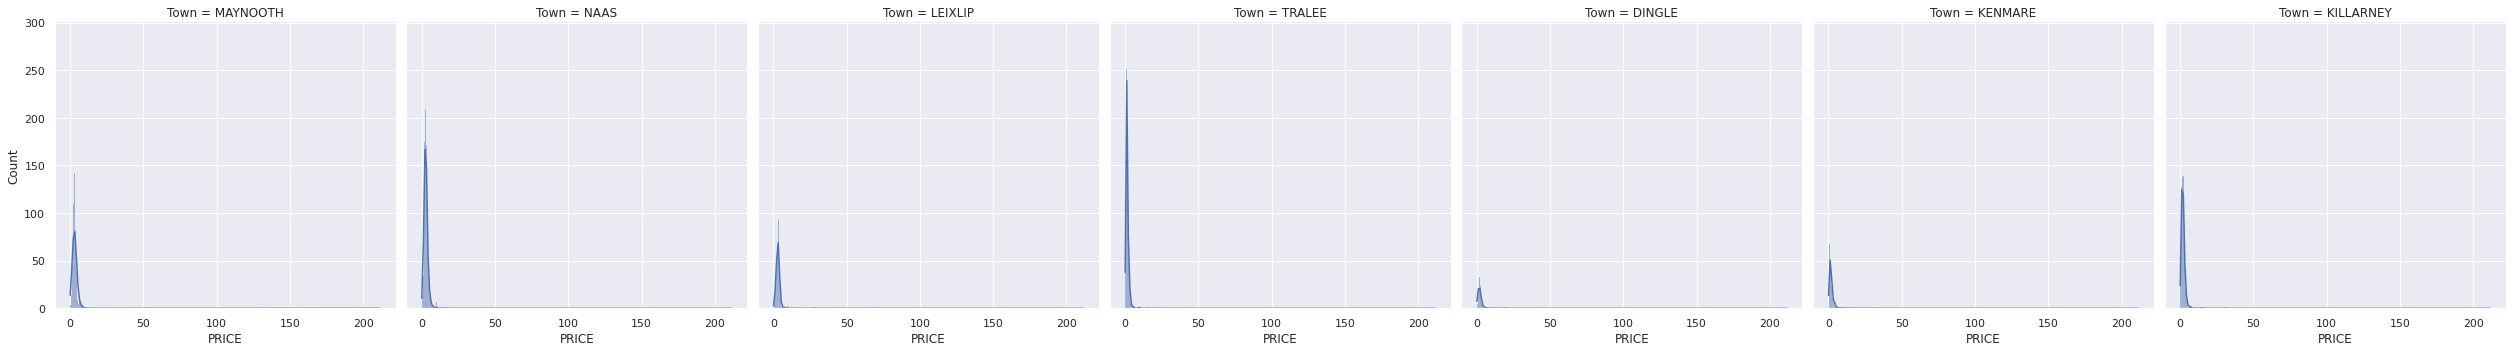

In [ ]:
sns.displot(df_alltowns, x="PRICE", col="Town", multiple="dodge",kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'KENMARE')

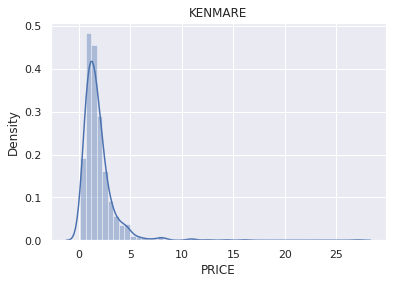

In [ ]:
sns.distplot(df_ken['PRICE']);
plt.title('KENMARE')

# Plotting the count of sales for each month and every year
We will make all these plots for all towns

In [ ]:
#creating new dataframes which have count for every month and every year
df_m1=df_maynooth.groupby(['Year','Month'])['PRICE'].count()
df_m1=df_m1.add_suffix('').reset_index()
df_m1.rename(columns={'PRICE':'COUNT'}, inplace=True)
df_l1=df_leixlip.groupby(['Year','Month'])['PRICE'].count()
df_l1=df_l1.add_suffix('').reset_index()
df_l1.rename(columns={'PRICE':'COUNT'}, inplace=True)
df_n1=df_naas.groupby(['Year','Month'])['PRICE'].count()
df_n1=df_n1.add_suffix('').reset_index()
df_n1.rename(columns={'PRICE':'COUNT'}, inplace=True)
df_d1=df_d.groupby(['Year','Month'])['PRICE'].count()
df_d1=df_d1.add_suffix('').reset_index()
df_d1.rename(columns={'PRICE':'COUNT'}, inplace=True)
df_k1=df_ken.groupby(['Year','Month'])['PRICE'].count()
df_k1=df_k1.add_suffix('').reset_index()
df_k1.rename(columns={'PRICE':'COUNT'}, inplace=True)
df_ki1=df_kil.groupby(['Year','Month'])['PRICE'].count()
df_ki1=df_ki1.add_suffix('').reset_index()
df_ki1.rename(columns={'PRICE':'COUNT'}, inplace=True)
df_t1=df_t.groupby(['Year','Month'])['PRICE'].count()
df_t1=df_t1.add_suffix('').reset_index()
df_t1.rename(columns={'PRICE':'COUNT'}, inplace=True)

In [ ]:
towns=['Maynooth','Dingle','Killarney','Kenmare','Leixlip','Naas','Tralee']
i=0
for x in [df_m1, df_d1,df_ki1, df_k1,df_l1,df_n1,df_t1]:
  fig = px.bar(x, x='Year', y='COUNT', color='Month', title=towns[i])
  i+=1
  fig.show()

# Plot for total sales for each town for every year

In [ ]:
df_alltowns1 = df_alltowns.groupby(['Town','Year'])['PRICE'].count()
df_alltowns1=df_alltowns1.add_suffix('').reset_index()
df_alltowns1.rename(columns={'PRICE':'COUNT'}, inplace=True)


In [ ]:
fig = px.bar(df_alltowns1, x='Town', y='COUNT', color='Year', title='Total sales per year for every town')
fig.show()


In [ ]:
df_kildare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23026 entries, 0 to 23025
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       23026 non-null  datetime64[ns]
 1   Address                    23026 non-null  object        
 2   Postal Code                9 non-null      object        
 3   County                     23026 non-null  object        
 4   Price                      23026 non-null  float64       
 5   Not Full Market Price      23026 non-null  object        
 6   VAT Exclusive              23026 non-null  object        
 7   Description of Property    23026 non-null  object        
 8   Property Size Description  4005 non-null   object        
 9   PRICE                      23026 non-null  float64       
 10  Year                       23026 non-null  int64         
 11  Month                      23026 non-null  int64         
dtypes: d

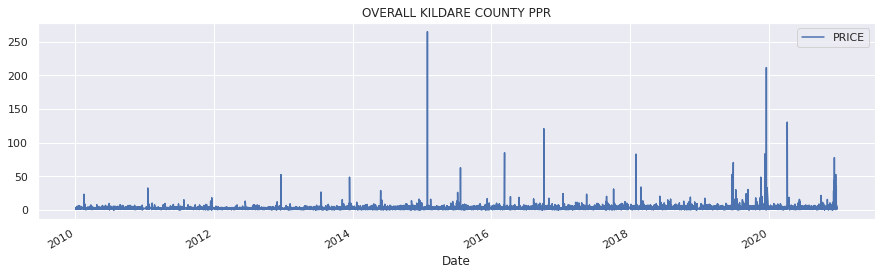

In [ ]:
df_kildare.plot(y=["PRICE"], figsize=(15,4), title="OVERALL KILDARE COUNTY PPR")


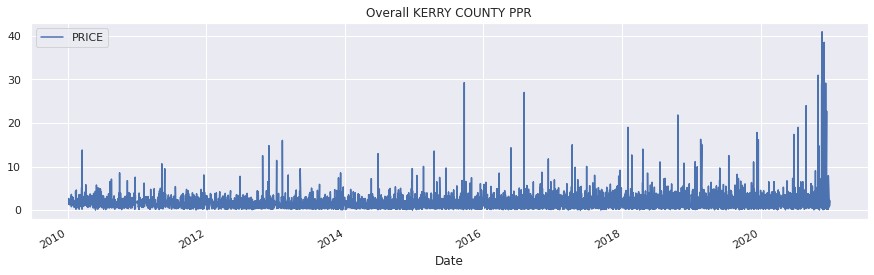

In [ ]:
df_kerry.plot(y=["PRICE"], figsize=(15,4),title="Overall KERRY COUNTY PPR")


In [ ]:
#grouped_alltowns = df_alltowns.groupby(['Town','YEAR'])

In [ ]:
#grouped_alltowns[["PRICE"]].resample("1y").median().plot(figsize=(15,4))

In [ ]:
grouped_towns=df_alltowns.groupby(['Town','Year'])['PRICE'].sum()
grouped_towns=grouped_towns.add_suffix('').reset_index()
grouped_towns.rename(columns={'PRICE':'SUM OF SALE'}, inplace=True)

In [ ]:
grouped_towns.head()

,Town,Year,SUM OF SALE
0,DINGLE,2010,42.256278
1,DINGLE,2011,26.599843
2,DINGLE,2012,38.766719
3,DINGLE,2013,50.382910
4,DINGLE,2014,64.964185


In [ ]:

#df = px.data.gapminder().query("country=='Canada'")
fig = px.line(grouped_towns, x="Year", y="SUM OF SALE", title='Sum of Sale per year',color='Town')
fig.show()

In [ ]:
df_alltowns.groupby(['Town','Year'])['PRICE'].mean()

Town    Year
DINGLE  2010    2.112814
        2011    1.899989
        2012    1.491028
        2013    1.481850
        2014    1.476459
                  ...   
TRALEE  2016    1.240516
        2017    1.151673
        2018    1.360651
        2019    1.605551
        2020    1.711490
Name: PRICE, Length: 77, dtype: float64

In [ ]:
mean_grouped_towns=df_alltowns.groupby(['Town','Year'])['PRICE'].mean()
mean_grouped_towns=mean_grouped_towns.add_suffix('').reset_index()
mean_grouped_towns.rename(columns={'PRICE':'MEAN OF SALE'}, inplace=True)

In [ ]:
#df = px.data.gapminder().query("country=='Canada'")
fig = px.line(mean_grouped_towns, x="Year", y="MEAN OF SALE", title='Mean of Sale per year for every town',color='Town')
fig.show()

# Overall Comaprison of mean selling price for all towns

In [ ]:
df_d.shape

(479, 14)

In [ ]:
m = df_maynooth.loc[:,"Price"].mean()
l = df_leixlip.loc[:,"Price"].mean()
n = df_naas.loc[:,"Price"].mean()

d = df_d.loc[:,"Price"].mean()
t = df_t.loc[:,"Price"].mean()
kil = df_kil.loc[:,"Price"].mean()
ken = df_ken.loc[:,"Price"].mean()
data = {'Price':[d,t,kil,ken], 'Town':['Dingle','Tralee','Killarney','Kenmare']}
data_plot = pd.DataFrame(data, columns = ['Price', 'Town'])

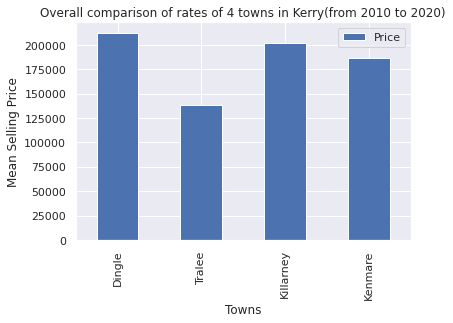

In [ ]:
data_plot.plot(x='Town', y='Price', kind='bar')
plt.title('Overall comparison of rates of 4 towns in Kerry(from 2010 to 2020)')
plt.ylabel('Mean Selling Price')
plt.xlabel('Towns')

plt.show()

In [ ]:
data1 = {'Price':[m,n,l], 'Town':['Maynooth','Naas','Leixlip']}
data1_plot = pd.DataFrame(data1, columns = ['Price', 'Town'])

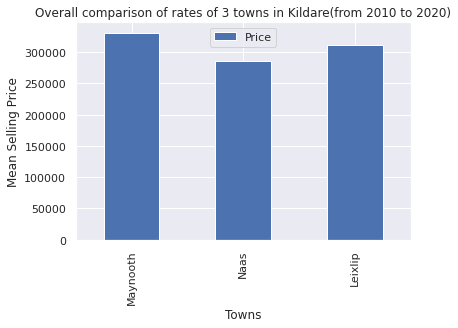

In [ ]:
data1_plot.plot(x='Town', y='Price', kind='bar')
plt.title('Overall comparison of rates of 3 towns in Kildare(from 2010 to 2020)')
plt.ylabel('Mean Selling Price')
plt.xlabel('Towns')

plt.show()

# Calculation of IQR and visualising the outliers in pie charts

In [ ]:
min_df1 = df_kerry.loc[:,"Price"].min()
max_df1 = df_kerry.loc[:,"Price"].max()
min_df2 = df_kildare.loc[:,"Price"].min()
max_df2 = df_kildare.loc[:,"Price"].max()

In [ ]:
t1 = {'County': ['Kerry', 'Kildare'],
          'Min Price': [min_df1,min_df2], 
        'Max Price':[max_df1,max_df2]}
pd.DataFrame(t1, columns = ['County','Min Price', 'Max Price'])

,County,Min Price,Max Price
0,Kerry,5250.0,4096916.28
1,Kildare,6500.0,26500000.00


In [ ]:
ky_25 = df_kerry.loc[:,"Price"].describe()[4]
ky_75 = df_kerry.loc[:,"Price"].describe()[6]
ki_25 = df_kildare.loc[:,"Price"].describe()[4]
ki_75 = df_kildare.loc[:,"Price"].describe()[6]
ki_UO = ((ki_75-ki_25) * 1.5) + ki_75
ki_LO = ki_25 -((ki_75-ki_25) * 1.5) 
ky_UO = ((ky_75-ky_25) * 1.5) + ky_75
ky_LO =  ky_25 - ((ky_75-ky_25) * 1.5) 

In [ ]:
#Now, number of houses sold below and above this range-
#KERRY
ky1 = sum(df_kerry["Price"]<= ky_LO)
ky2 = sum(df_kerry["Price"]> ky_UO)
ky3 = df_kerry["Price"].count()
ky4 = ky3 -(ky2+ky1)

#KILDARE
ki1 = sum(df_kildare["Price"]<= ki_LO)
ki2 = sum(df_kildare["Price"]> ki_UO)
ki3 = df_kildare["Price"].count()
ki4 = ki3 -(ki2+ki1)

In [ ]:
kerry = {'No. of Houses': [ky1,ky2,ky4],
          'Range': ['<= 25%','>75%','In Between']} 
        
pd.DataFrame(kerry, columns = ['No. of Houses','Range'])

,No. of Houses,Range
0,0,<= 25%
1,470,>75%
2,12774,In Between


In [ ]:
kildare = {'No. of Houses': [ki1,ki2,ki4],
          'Range': ['<= 25%','>75%','In Between']} 
        
pd.DataFrame(kildare, columns = ['No. of Houses','Range'])

,No. of Houses,Range
0,0,<= 25%
1,696,>75%
2,22330,In Between


In [ ]:
#KERRY
fig = px.pie(kerry, values='No. of Houses', names='Range', title='Number of houses in a given range')
fig.show()

In [ ]:
#KILDARE
fig = px.pie(kildare, values='No. of Houses', names='Range', title='Number of houses in a given range')
fig.show()

# Table for comparison of minimum, maximum and average prices for all towns

In [ ]:
m_max = df_maynooth.loc[:,"Price"].mean()
n_max = df_naas.loc[:,"Price"].mean()
l_max = df_leixlip.loc[:,"Price"].mean()
m_min = df_maynooth.loc[:,"Price"].min()
n_min = df_naas.loc[:,"Price"].min()
l_min = df_leixlip.loc[:,"Price"].min()
m_max = df_maynooth.loc[:,"Price"].max()
n_max = df_naas.loc[:,"Price"].max()
l_max = df_leixlip.loc[:,"Price"].max()

In [ ]:
d_max = df_d.loc[:,"Price"].max()
t_max = df_t.loc[:,"Price"].max()
kil_max = df_kil.loc[:,"Price"].max()
ken_max = df_ken.loc[:,"Price"].max()
d_mean = df_d.loc[:,"Price"].mean()
t_mean = df_t.loc[:,"Price"].mean()
kil_mean = df_kil.loc[:,"Price"].mean()
ken_mean = df_ken.loc[:,"Price"].mean()
d_min = df_d.loc[:,"Price"].min()
t_min = df_t.loc[:,"Price"].min()
kil_min = df_kil.loc[:,"Price"].min()
ken_min = df_ken.loc[:,"Price"].min()

In [ ]:
table1 = {'Town':['Dingle','Tralee','Killarney','Kenmare','Maynooth', 'Naas', 'Leixlip'], 
          'County': ['Kerry', 'Kerry', 'Kerry', 'Kerry', 'Kildare', 'Kildare', 'Kildare'],
          'Minimum Price': [d_min,t_min,kil_min,ken_min,m_min,n_min,l_min], 
        'Maximum Price':[d_max,t_max,kil_max,ken_max,m_max,n_max,l_max], 'Average Price': [d,t,kil,ken,m,n,l]}
table = pd.DataFrame(table1, columns = ['Town', 'County','Minimum Price', 'Maximum Price', 'Average Price'])
table

,Town,County,Minimum Price,Maximum Price,Average Price
0,Dingle,Kerry,16000.00,2925000.00,212274.097933
1,Tralee,Kerry,7000.00,2273127.75,138156.559981
2,Killarney,Kerry,6338.69,4096916.28,202068.811652
3,Kenmare,Kerry,12336.00,2700000.00,186476.068591
4,Maynooth,Kildare,17834.03,21155144.72,331031.371907
5,Naas,Kildare,10000.00,12073334.00,285108.824669
6,Leixlip,Kildare,12000.00,7040000.00,311419.546821
